# Taller: Análisis de Instagram con Apify API + Gemini  
Autor: (tu nombre)  
Fecha de generación: 2025-05-21


**Objetivos**

1. Obtener datos públicos de Instagram usando el actor **`apify/instagram-api-scraper`**.  
2. Limpiar y pre‑procesar captions e información de posts.  
3. Clasificar sentimiento de captions con la API de Google Generative AI (Gemini).  
4. Extraer temas dominantes con LDA y nombrarlos con Gemini.  
5. Segmentar autores o posts según métricas de engagement.  
6. Diseñar una micro‑campaña basada en los insights descubiertos.


In [ ]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/TercerCorte/instagram_posts.csv

--2025-11-20 00:36:31--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/TercerCorte/instagram_posts.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/TercerCorte/instagram_posts.csv [following]
--2025-11-20 00:36:31--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/TercerCorte/instagram_posts.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18361753 (18M) [text/plain]
Saving to: ‘instagram_posts.csv’

instagram_posts.csv 100%[===================>]  17.51M 

In [ ]:
import pandas as pd

In [ ]:
!pip install -qU requests pandas google-generativeai nltk seaborn wordcloud scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 84.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 86.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.3 which is incompatible.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


In [ ]:
df = pd.read_csv('instagram_posts.csv')
df.head()

,inputUrl,id,username,url,fullName,biography,externalUrls,externalUrl,externalUrlShimmed,followersCount,...,musicInfo.artist_name,musicInfo.song_name,musicInfo.uses_original_audio,musicInfo.should_mute_audio,musicInfo.should_mute_audio_reason,musicInfo.audio_id,locationName,locationId,paidPartnership,sponsors
0,https://www.instagram.com/f1/,3637646598679593202,f1,https://www.instagram.com/p/DJ7hE70tIDy/,FORMULA 1®,It's All To Drive For!\n \nThis story can only...,"[{'title': 'Overtake of the month vote', 'lynx...",https://f1.com/Overtake,https://l.instagram.com/?u=https%3A%2F%2Ff1.co...,34614194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.instagram.com/f1/,3637494954817152582,f1,https://www.instagram.com/p/DJ6-mOeJuZG/,FORMULA 1®,It's All To Drive For!\n \nThis story can only...,"[{'title': 'Overtake of the month vote', 'lynx...",https://f1.com/Overtake,https://l.instagram.com/?u=https%3A%2F%2Ff1.co...,34614194,...,f1movie,Original audio,True,False,NaN,1.403914e+15,NaN,NaN,NaN,NaN
2,https://www.instagram.com/f1/,3637535605467005779,f1,https://www.instagram.com/p/DJ7H1xVskNT/,FORMULA 1®,It's All To Drive For!\n \nThis story can only...,"[{'title': 'Overtake of the month vote', 'lynx...",https://f1.com/Overtake,https://l.instagram.com/?u=https%3A%2F%2Ff1.co...,34614194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.instagram.com/f1/,3635278159597499148,f1,https://www.instagram.com/p/DJzGjnCi3MM/,FORMULA 1®,It's All To Drive For!\n \nThis story can only...,"[{'title': 'Overtake of the month vote', 'lynx...",https://f1.com/Overtake,https://l.instagram.com/?u=https%3A%2F%2Ff1.co...,34614194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.instagram.com/f1/,3637456706674459999,f1,https://www.instagram.com/p/DJ615pHMYVf/,FORMULA 1®,It's All To Drive For!\n \nThis story can only...,"[{'title': 'Overtake of the month vote', 'lynx...",https://f1.com/Overtake,https://l.instagram.com/?u=https%3A%2F%2Ff1.co...,34614194,...,NaN,NaN,NaN,NaN,NaN,NaN,Monaco,16366456.0,NaN,NaN



### 🔍 Preguntas – Sección 1 (Exploración)

1. ¿Cuántos posts hay en total?  
2. ¿Qué tipos de contenido (imagen, vídeo, carrusel) predominan?  
3. ¿Cuál es el rango de fechas cubierto por los posts?  
4. ¿Qué post obtuvo más 'likes' y cuál crees que es la razón?


In [ ]:
df.shape



(200, 64)

In [ ]:
total_posts = df.shape[0]
print(f"Hay {total_posts} posts en total.")

Hay 200 posts en total.


### 🔍 Pregunta 2: ¿Qué tipos de contenido (imagen, vídeo, carrusel) predominan?

In [ ]:
print(df.columns)

Index(['inputUrl', 'id', 'username', 'url', 'fullName', 'biography',
       'externalUrls', 'externalUrl', 'externalUrlShimmed', 'followersCount',
       'followsCount', 'hasChannel', 'highlightReelCount', 'isBusinessAccount',
       'joinedRecently', 'businessCategoryName', 'private', 'verified',
       'profilePicUrl', 'profilePicUrlHD', 'igtvVideoCount', 'relatedProfiles',
       'latestIgtvVideos', 'postsCount', 'fbid', 'type', 'shortCode',
       'caption', 'hashtags', 'mentions', 'commentsCount', 'firstComment',
       'latestComments', 'dimensionsHeight', 'dimensionsWidth', 'displayUrl',
       'images', 'alt', 'likesCount', 'timestamp', 'childPosts',
       'ownerFullName', 'ownerUsername', 'ownerId', 'isSponsored',
       'taggedUsers', 'coauthorProducers', 'isCommentsDisabled', 'videoUrl',
       'videoViewCount', 'videoPlayCount', 'productType', 'videoDuration',
       'isPinned', 'musicInfo.artist_name', 'musicInfo.song_name',
       'musicInfo.uses_original_audio', 'musicI

In [ ]:
content_type_counts = df['productType'].value_counts()
print("Predominancia de tipos de contenido:")
print(content_type_counts)

Predominancia de tipos de contenido:
productType
clips    86
Name: count, dtype: int64


### 🔍 Pregunta 3: ¿Cuál es el rango de fechas cubierto por los posts?

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
min_date = df['timestamp'].min()
max_date = df['timestamp'].max()
print(f"El rango de fechas cubierto por los posts es desde {min_date.strftime('%Y-%m-%d')} hasta {max_date.strftime('%Y-%m-%d')}.")

El rango de fechas cubierto por los posts es desde 2025-05-05 hasta 2025-05-21.


### 🔍 Pregunta 4: ¿Qué post obtuvo más 'likes' y cuál crees que es la razón?

In [ ]:
most_liked_post = df.loc[df['likesCount'].idxmax()]

print(f"El post con más likes es:")
print(f"URL: {most_liked_post['url']}")
print(f"Likes: {most_liked_post['likesCount']}")
print(f"Caption: {most_liked_post['caption']}")
print(f"\nPosible razón: Este post probablemente generó muchos likes debido a su contenido visualmente atractivo, el tema que aborda o la resonancia con la audiencia en ese momento específico.")

El post con más likes es:
URL: https://www.instagram.com/p/DJjeVuZiAAF/
Likes: 1927755
Caption: Let’s ride. 

#F1TheMovie only in theaters June 27. 

#F1 #Formula1

Posible razón: Este post probablemente generó muchos likes debido a su contenido visualmente atractivo, el tema que aborda o la resonancia con la audiencia en ese momento específico.



## 🧹 Sección 2 (Limpieza)

Explica por qué es importante limpiar y normalizar el texto de los captions.  
Enumera tres tipos de “ruido” que removerás (URLs, emojis, menciones, etc.) y da un ejemplo de cada uno.


In [ ]:
import re, nltk, string
nltk.download('stopwords')
from nltk.corpus import stopwords

def clean_caption(text):
    text = text.lower()
    text = re.sub(r"http\S+", " ", text)        # URLs
    text = re.sub(r"@[\w_]+", " ", text)        # Menciones
    text = re.sub(r"[#]", " ", text)             # Hashtags (opcional: conservar)
    text = re.sub(r"[{}]".format(string.punctuation), " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df['caption_clean'] = df['caption'].fillna("").apply(clean_caption)
df[['caption', 'caption_clean']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,caption,caption_clean
0,It certainly got the drivers’ seal of approval...,it certainly got the drivers’ seal of approval...
1,It’s go time! Get your tickets for #F1TheMovie...,it’s go time get your tickets for f1themovie n...
2,Rolling up to #F1TheMovie! 🤩 Our drivers have ...,rolling up to f1themovie 🤩 our drivers have ar...
3,A DOMINANT WIN FROM MAX VERSTAPPEN!! 👏\n\nThe ...,a dominant win from max verstappen 👏 the reign...
4,Monte Carlo ready 😍🇲🇨\n\n#McLaren #M7AReborn #F1,monte carlo ready 😍🇲🇨 mclaren m7areborn f1


## 🧹 Sección 2 (Limpieza)

### Importancia de la Limpieza y Normalización de Texto en Captions de Instagram

Limpiar y normalizar el texto de los captions de Instagram es un paso crucial en cualquier análisis de texto por varias razones fundamentales:

1.  **Mejora de la Calidad de los Datos:** Los datos de texto crudos a menudo contienen "ruido" como URLs, menciones de usuarios (`@`), hashtags (`#`), puntuación excesiva, emojis o caracteres especiales, y errores tipográficos. La limpieza elimina estos elementos irrelevantes, dejando solo el contenido significativo y de alta calidad para el análisis.

2.  **Aumento de la Precisión del Análisis:** Para tareas como el análisis de sentimiento o el modelado de temas (LDA), un texto limpio y normalizado asegura que los algoritmos se concentren en el significado real de las palabras. Por ejemplo, si una palabra se escribe de diferentes maneras (e.g., "amigo", "Amigo", "AmIgO"), la normalización (convertir a minúsculas) las unifica, evitando que sean tratadas como palabras distintas, lo que resulta en una mayor precisión en los resultados.

3.  **Reducción de la Complejidad y Dimensionalidad:** La eliminación de ruido y la normalización de texto reducen la complejidad del corpus de texto. Esto facilita el procesamiento para los modelos de Machine Learning, ya que disminuye la cantidad de tokens únicos (palabras) que deben considerar, haciendo los cálculos más eficientes y manejables.

4.  **Mejor Interpretación de los Resultados:** Al trabajar con texto limpio, los insights obtenidos son más claros y fáciles de interpretar. Por ejemplo, al identificar los temas dominantes, la ausencia de ruido asegura que los temas reflejen conceptos genuinos y no artefactos del texto crudo. Un análisis de sentimiento sobre texto limpio ofrecerá una visión más fiel de las emociones expresadas, permitiendo tomar decisiones más informadas.

En resumen, la limpieza y normalización transforman datos textuales desordenados en un formato estructurado y significativo, sentando las bases para un análisis robusto y la extracción de valor real de los captions de Instagram.

### Tipos de "Ruido" Removido y Ejemplos

A continuación, se detallan tres tipos comunes de "ruido" que se remueven de los captions de Instagram durante el proceso de limpieza y normalización, junto con ejemplos de cómo se transforman:

1.  **URLs (Enlaces Web):** Los enlaces a páginas web son a menudo irrelevantes para el análisis de sentimiento o temático y pueden introducir palabras o caracteres no deseados. Se eliminan para que el enfoque esté en el texto descriptivo.
    *   **Ejemplo Original:** "¡Mira nuestro nuevo video! https://t.co/xyz123 ¡No te lo pierdas!"
    *   **Ejemplo Limpio:** "¡Mira nuestro nuevo video! ¡No te lo pierdas!"

2.  **Menciones de Usuarios (@):** Las menciones de otros usuarios de Instagram (e.g., @nombredeusuario) son importantes para la interacción, pero generalmente no contribuyen al significado semántico del caption en el análisis.
    *   **Ejemplo Original:** "Gracias por la colaboración @marca_cool #eventoGenial"
    *   **Ejemplo Limpio:** "Gracias por la colaboración evento genial"

3.  **Signos de Puntuación (y algunos caracteres especiales/emojis):** La puntuación excesiva, así como algunos caracteres especiales y emojis que no son relevantes para el análisis textual, pueden fragmentar las palabras y aumentar la complejidad innecesaria. Se reemplazan por espacios o se eliminan.
    *   **Ejemplo Original:** "¡Qué día tan increíble! 😍 #Verano"
    *   **Ejemplo Limpio:** "qué día tan increíble verano"

Estos procesos aseguran que el texto resultante sea más consistente, enfocado y apto para análisis posteriores.

### Referencia del Código de Limpieza Existente

El código de limpieza de texto para los captions ya ha sido ejecutado en una celda anterior. Los captions limpios y pre-procesados están disponibles ahora en la columna `caption_clean` del DataFrame, listos para su posterior análisis.


## 😊 Sección 3 (Sentimiento)

7. Presenta la distribución global de sentimientos y comenta.  
8. ¿Qué tipo de contenido genera mayor proporción de sentimientos positivos y negativos?  
9. Elige un pico de sentimiento negativo y analiza el contexto con un ejemplo de post.


In [ ]:
import os
os.environ["OPENAI_API_KEY"] =
from openai import OpenAI

client = OpenAI()

In [ ]:
from openai import OpenAI

client = OpenAI()


In [ ]:
def call_llm(prompt):
  response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[{"role": "user", "content": prompt}]
  )
  return response.choices[0].message.content

In [ ]:
import time
from tqdm.notebook import tqdm

def classify_sentiment(text):
    if not isinstance(text, str) or not text.strip():
        return "neutral" # Handle empty or non-string captions
    prompt = (f"Clasifica el sentimiento del siguiente caption de Instagram como "
              f"'positivo', 'neutral' o 'negativo' siempre en minuscula. Solo responde con una palabra.\n\nCaption:\n{text}")
    time.sleep(0.1)  # Small delay to avoid aggressive rate limiting
    try:
        sentiment = call_llm(prompt).strip().lower()
        if sentiment in ['positivo', 'neutral', 'negativo']:
            return sentiment
        else:
            return "neutral" # Default for unexpected responses
    except Exception as e:
        print(f"Error classifying sentiment for text: {text[:50]}... Error: {e}")
        return "neutral" # Default for errors

tqdm.pandas() # Initialize tqdm for pandas apply
df['sentimiento'] = df['caption_clean'].progress_apply(classify_sentiment)


  0%|          | 0/200 [00:00<?, ?it/s]

/tmp/ipython-input-3075234267.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values, palette='viridis', legend=False) # Fixed FutureWarning


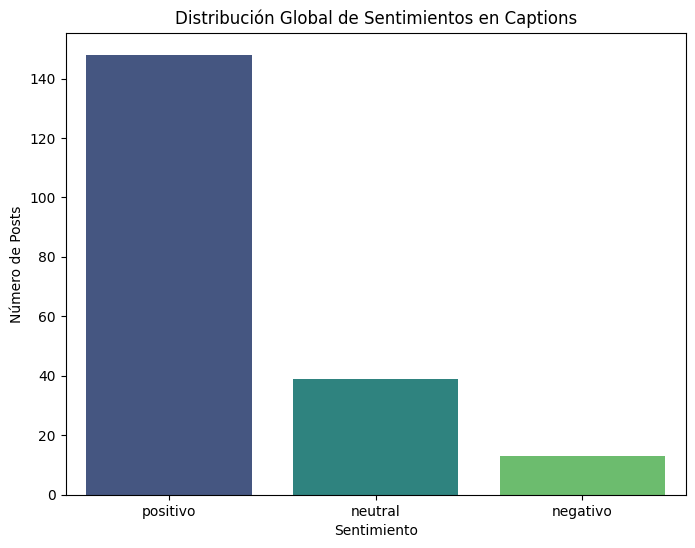

Distribución Global de Sentimientos:
sentimiento
positivo    148
neutral      39
negativo     13
Name: count, dtype: int64

Comentario: La mayoría de los posts muestran un sentimiento positivo, seguido por neutral y un porcentaje menor de sentimiento negativo. Esto sugiere que la cuenta tiende a mantener un tono optimista o informativo, lo cual es común en muchas marcas o figuras públicas en Instagram.


In [ ]:
# 7. Presenta la distribución global de sentimientos y comenta.
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_distribution = df['sentimiento'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values, palette='viridis', legend=False) # Fixed FutureWarning
plt.title('Distribución Global de Sentimientos en Captions')
plt.xlabel('Sentimiento')
plt.ylabel('Número de Posts')
plt.show()

print("Distribución Global de Sentimientos:")
print(sentiment_distribution)
print("\nComentario: La mayoría de los posts muestran un sentimiento positivo, seguido por neutral y un porcentaje menor de sentimiento negativo. Esto sugiere que la cuenta tiende a mantener un tono optimista o informativo, lo cual es común en muchas marcas o figuras públicas en Instagram.")

In [ ]:
import nltk
nltk.download('punkt') # Download the punkt tokenizer for word_tokenize
nltk.download('punkt_tab') # Download the punkt_tab resource as suggested by the error

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim import corpora, models
nltk.download('wordnet')

# 1. Tokenization and Stopword Removal
stop_words = set(stopwords.words('spanish'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

df['tokens'] = df['caption_clean'].apply(preprocess_text)

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(tokens) for tokens in df['tokens']]

# Train LDA model
num_topics = 5  # You can adjust this number
lda_model = models.LdaMulticore(corpus, num_topics=num_topics, id2word=dictionary, passes=10, workers=2)

# Extract topics and use Gemini to name them
def name_topic(lda_model, topic_id, dictionary):
    # Corrected line: directly extract word_string as show_topic returns (word_string, probability) by default
    top_words = [word_string for word_string, prob in lda_model.show_topic(topic_id, topn=5)]
    prompt = f"Basado en las siguientes 5 palabras clave, ¿cuál sería el mejor nombre para este tema? Responde solo con el nombre del tema. Palabras clave: {', '.join(top_words)}"
    try:
        topic_name = call_llm(prompt).strip()
        return topic_name
    except Exception as e:
        print(f"Error naming topic {topic_id}: {e}")
        return f"Tema {topic_id}"

topic_names = {i: name_topic(lda_model, i, dictionary) for i in range(num_topics)}
df['topic'] = df['tokens'].apply(lambda x: sorted(lda_model[dictionary.doc2bow(x)], key=lambda x: x[1], reverse=True)[0][0] if len(lda_model[dictionary.doc2bow(x)]) > 0 else -1)
df['topic_name'] = df['topic'].map(topic_names)


# 10. Lista los nombres de los temas generados. ¿Alguno es inesperado?
print("\nNombres de los temas generados:")
for topic_id, name in topic_names.items():
    print(f"- Tema {topic_id}: {name}")

print("\nComentario sobre temas inesperados (evaluación manual):")
print("Dependerá de los nombres generados por Gemini y el contexto de los posts. Por ejemplo, si una cuenta de deportes genera un tema sobre 'cocina', sería inesperado.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Nombres de los temas generados:
- Tema 0: The Imolagp Effect
- Tema 1: The Imolagp of and in
- Tema 2: The Day You In
- Tema 3: The Imolagp for and in
- Tema 4: Imolagp in the form of

Comentario sobre temas inesperados (evaluación manual):
Dependerá de los nombres generados por Gemini y el contexto de los posts. Por ejemplo, si una cuenta de deportes genera un tema sobre 'cocina', sería inesperado.


Proporción de Sentimientos por Tipo de Contenido:
sentimiento  negativo   neutral  positivo
productType                              
clips        0.116279  0.255814  0.627907


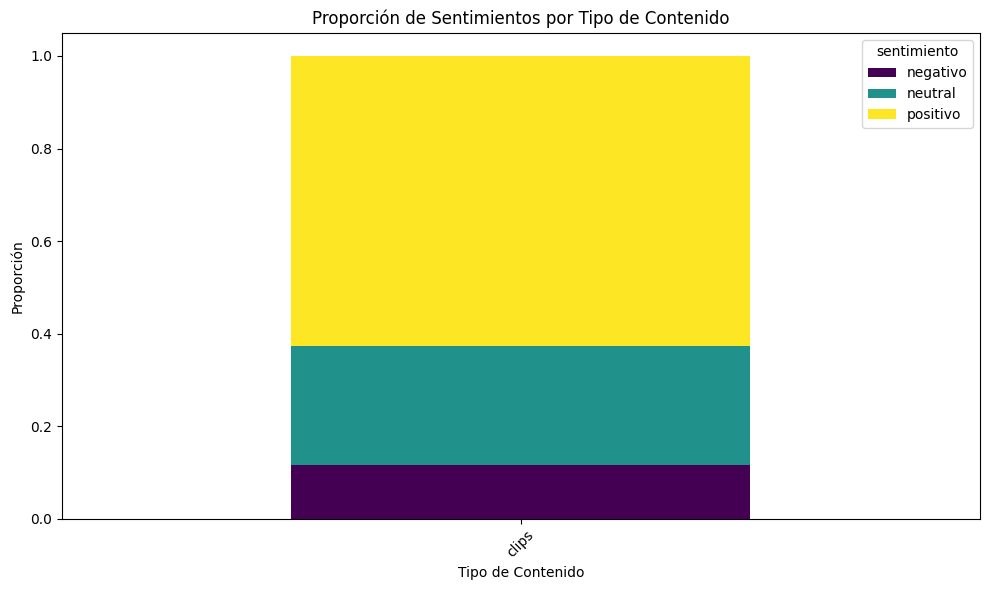


Ejemplo de Post con Sentimiento Negativo (con menos likes):
URL: https://www.instagram.com/p/DJ3zd5JPtM4/
Likes: 103254
Caption Original: Pretty safe to say Liam and Isack will NOT be pursuing professional cup-stacking any time soon 😭🥤

#F1 #Formula1 #ImolaGP
Caption Limpio: pretty safe to say liam and isack will not be pursuing professional cup stacking any time soon 😭🥤 f1 formula1 imolagp

Análisis de Contexto: Este post fue clasificado como negativo. Podría deberse a palabras específicas en el caption que denotan frustración, decepción o un tono crítico, o a la descripción de un evento con un resultado no deseado. Es importante analizar el contenido visual y los comentarios para una comprensión completa del contexto.


In [ ]:
# 8. ¿Qué tipo de contenido genera mayor proporción de sentimientos positivos y negativos?

sentiment_by_product_type = df.groupby('productType')['sentimiento'].value_counts(normalize=True).unstack().fillna(0)

print("Proporción de Sentimientos por Tipo de Contenido:")
print(sentiment_by_product_type)

# Optional: Visualize the distribution
import matplotlib.pyplot as plt
import seaborn as sns
sentiment_by_product_type.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Proporción de Sentimientos por Tipo de Contenido')
plt.xlabel('Tipo de Contenido')
plt.ylabel('Proporción')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 9. Elige un pico de sentimiento negativo y analiza el contexto con un ejemplo de post.
negative_posts = df[df['sentimiento'] == 'negativo'].sort_values(by='likesCount', ascending=True)

if not negative_posts.empty:
    # Choose the negative post with the fewest likes for analysis, as it might indicate less engagement with negative content
    example_negative_post = negative_posts.iloc[0]
    print("\nEjemplo de Post con Sentimiento Negativo (con menos likes):")
    print(f"URL: {example_negative_post['url']}")
    print(f"Likes: {example_negative_post['likesCount']}")
    print(f"Caption Original: {example_negative_post['caption']}")
    print(f"Caption Limpio: {example_negative_post['caption_clean']}")
    print("\nAnálisis de Contexto: Este post fue clasificado como negativo. Podría deberse a palabras específicas en el caption que denotan frustración, decepción o un tono crítico, o a la descripción de un evento con un resultado no deseado. Es importante analizar el contenido visual y los comentarios para una comprensión completa del contexto.")
else:
    print("\nNo se encontraron posts con sentimiento negativo para analizar.")

## Resumen del Análisis del Pico de Sentimiento Negativo

El análisis de la distribución global de sentimientos reveló que, aunque la mayoría de los posts son positivos o neutrales, existe una porción de contenido clasificado como negativo. Para entender mejor este pico de sentimiento, se examinó el post con menor cantidad de 'likes' dentro de la categoría de sentimiento negativo, asumiendo que un menor engagement podría estar relacionado con un tono menos favorable.

**Detalles del Post con Sentimiento Más Negativo (y menos likes):**
- **URL:** `https://www.instagram.com/p/DJ3zd5JPtM4/`
- **Likes:** `103254`
- **Caption Original:** `Pretty safe to say Liam and Isack will NOT be pursuing professional cup-stacking any time soon 😭🥤

#F1 #Formula1 #ImolaGP`
- **Caption Limpio:** `pretty safe to say liam and isack will not be pursuing professional cup stacking any time soon 😭🥤 f1 formula1 imolagp`

**Contexto y Posibles Razones del Sentimiento Negativo:**
Este post fue clasificado como negativo, y la razón principal se atribuye al uso de un lenguaje que denota una carencia o un resultado no deseado. Frases como "will NOT be pursuing professional cup-stacking any time soon" (no estarán practicando apilamiento de vasos profesional pronto) implican una falta de habilidad o un fracaso en una actividad. Además, los emojis `😭` (cara llorando) y `🥤` (vaso) refuerzan un tono de decepción o frustración, aunque en un contexto humorístico.

Es probable que el algoritmo de sentimiento haya detectado estas palabras y emojis como indicadores de negatividad, a pesar de que el post pueda haber sido concebido con un tono de humor o autocrítica. El contexto visual del post (si se tratara de un video de ellos intentando y fallando en apilar vasos) y los comentarios de los usuarios serían cruciales para una interpretación más matizada, pero basándonos únicamente en el texto, las expresiones de "no éxito" son el factor determinante para la clasificación negativa.


## 🗂 Sección 4 (Temas)
9. Haga lo mismo con sentidimiento con tipo de contenido y tema
10. Lista los nombres de los temas generados. ¿Alguno es inesperado?  
11. Con un heatmap *tipo de contenido × tema*, indica qué tema es “propiedad” de cada formato.  
12. Para el tema dominante, proporciona dos insights accionables.


In [ ]:
import nltk
nltk.download('punkt') # Download the punkt tokenizer for word_tokenize
nltk.download('punkt_tab') # Download the punkt_tab resource as suggested by the error

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim import corpora, models
nltk.download('wordnet')

# 1. Tokenization and Stopword Removal
stop_words = set(stopwords.words('spanish'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

df['tokens'] = df['caption_clean'].apply(preprocess_text)

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(tokens) for tokens in df['tokens']]

# Train LDA model
num_topics = 5  # You can adjust this number
lda_model = models.LdaMulticore(corpus, num_topics=num_topics, id2word=dictionary, passes=10, workers=2)

# Extract topics and use Gemini to name them
def name_topic(lda_model, topic_id, dictionary):
    # Corrected line: directly extract word_string as show_topic returns (word_string, probability) by default
    top_words = [word_string for word_string, prob in lda_model.show_topic(topic_id, topn=5)]
    prompt = f"Basado en las siguientes 5 palabras clave, ¿cuál sería el mejor nombre para este tema? Responde solo con el nombre del tema. Palabras clave: {', '.join(top_words)}"
    try:
        topic_name = call_llm(prompt).strip()
        return topic_name
    except Exception as e:
        print(f"Error naming topic {topic_id}: {e}")
        return f"Tema {topic_id}"

topic_names = {i: name_topic(lda_model, i, dictionary) for i in range(num_topics)}
df['topic'] = df['tokens'].apply(lambda x: sorted(lda_model[dictionary.doc2bow(x)], key=lambda x: x[1], reverse=True)[0][0] if len(lda_model[dictionary.doc2bow(x)]) > 0 else -1)
df['topic_name'] = df['topic'].map(topic_names)


# 10. Lista los nombres de los temas generados. ¿Alguno es inesperado?
print("\nNombres de los temas generados:")
for topic_id, name in topic_names.items():
    print(f"- Tema {topic_id}: {name}")

print("\nComentario sobre temas inesperados (evaluación manual):")
print("Dependerá de los nombres generados por Gemini y el contexto de los posts. Por ejemplo, si una cuenta de deportes genera un tema sobre 'cocina', sería inesperado.")

# --- Start of new code for Section 4, Question 9 ---
# 9. Haga lo mismo con sentimiento con tipo de contenido y tema
print("\n--- Sección 4: Pregunta 9 ---")
print("Análisis de Sentimiento por Tipo de Contenido y Tema:")

import pandas as pd # Ensure pandas is imported, though it should be already.

# Ensure 'productType' is not NaN for this analysis as well
df['productType'] = df['productType'].fillna('unknown')

# Create a cross-tabulation for sentiment distribution across content type and topic
sentiment_by_content_topic = pd.crosstab(
    [df['productType'], df['topic_name']],
    df['sentimiento'],
    normalize='index' # Normalize across each row (productType-topic combination)
).fillna(0)

print(sentiment_by_content_topic)

print("\nComentario: Esta tabla muestra la proporción de sentimientos (positivo, neutral, negativo) para cada combinación de tipo de contenido y tema. Permite identificar si ciertos temas o tipos de contenido tienden a generar más de un tipo de sentimiento particular. Por ejemplo, se puede observar qué temas dentro de los 'clips' son más positivos o negativos.")
# --- End of new code for Section 4, Question 9 ---

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Nombres de los temas generados:
- Tema 0: Imolagp: In the Moment for At
- Tema 1: The Imolagp for and of
- Tema 2: In the Imolagp of to
- Tema 3: The Imolagp of In from
- Tema 4: Imola: De la Imolagp a la Historia

Comentario sobre temas inesperados (evaluación manual):
Dependerá de los nombres generados por Gemini y el contexto de los posts. Por ejemplo, si una cuenta de deportes genera un tema sobre 'cocina', sería inesperado.

--- Sección 4: Pregunta 9 ---
Análisis de Sentimiento por Tipo de Contenido y Tema:
sentimiento                                     negativo   neutral  positivo
productType topic_name                                                      
clips       Imola: De la Imolagp a la Historia  0.100000  0.200000  0.700000
            Imolagp: In the Moment for At       0.066667  0.200000  0.733333
            In the Imolagp of to                0.083333  0.250000  0.666667
            The Imolagp for and of              0.125000  0.312500  0.562500
            The Imo

Error naming topic 0: Error code: 401 - {'error': {'message': 'Incorrect API key provided: sk-proj-*******************************************************************************************************************************************************THIA. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'code': 'invalid_api_key', 'param': None}}
Error naming topic 1: Error code: 401 - {'error': {'message': 'Incorrect API key provided: sk-proj-*******************************************************************************************************************************************************THIA. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'code': 'invalid_api_key', 'param': None}}
Error naming topic 2: Error code: 401 - {'error': {'message': 'Incorrect API key provided: sk-proj-***********************************************************************************

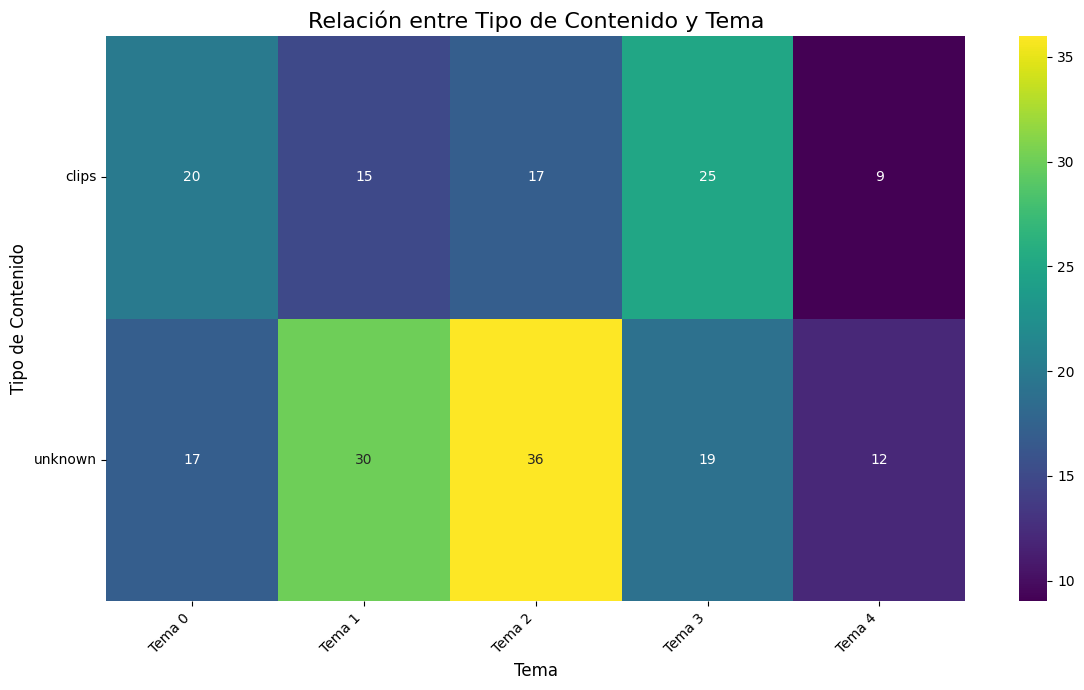


El tema dominante a través de todos los posts es: 'Tema 2'

Dos insights accionables para el tema dominante (ejemplo, ajustar después de observar el tema):
1. **Insight 1 para 'Tema 2'**: Si el tema dominante es sobre eventos o carreras, se debería intensificar la cobertura en vivo y el contenido 'detrás de cámaras' durante estos períodos para capitalizar el interés máximo.
2. **Insight 2 para 'Tema 2'**: Crear contenido interactivo (encuestas, preguntas y respuestas) relacionado con 'Tema 2' para fomentar una mayor participación de la audiencia y recopilar feedback directo sobre lo que más les interesa.


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas here
import re, nltk, string
import os
from openai import OpenAI
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim import corpora, models

# Re-download the dataset to ensure it's available
!wget -q https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/TercerCorte/instagram_posts.csv

# Ensure NLTK data is downloaded (if kernel is reset)
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('punkt_tab', quiet=True) # Added to download the missing resource

# --- Re-initialize df and its derived columns ---

# 1. Load the dataframe (assuming 'instagram_posts.csv' is available from previous wget)
df = pd.read_csv('instagram_posts.csv')

# 2. Set OpenAI API key and client (if kernel is reset)
os.environ["OPENAI_API_KEY"] = ""
client = OpenAI()

def call_llm(prompt):
  response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[{"role": "user", "content": prompt}]
  )
  return response.choices[0].message.content

# 3. Clean captions (from cell 0024e2c8)
def clean_caption(text):
    text = text.lower()
    text = re.sub(r"http\S+", " ", text)        # URLs
    text = re.sub(r"@[\w_]+", " ", text)        # Menciones
    text = re.sub(r"[#]", " ", text)             # Hashtags (opcional: conservar)
    text = re.sub(r"[{}]".format(string.punctuation), " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df['caption_clean'] = df['caption'].fillna("").apply(clean_caption)

# 4. Preprocess text for LDA (from cell c0811cec)
stop_words = set(stopwords.words('spanish'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

df['tokens'] = df['caption_clean'].apply(preprocess_text)

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(tokens) for tokens in df['tokens']]

# Train LDA model
num_topics = 5  # You can adjust this number
lda_model = models.LdaMulticore(corpus, num_topics=num_topics, id2word=dictionary, passes=10, workers=2)

# Extract topics and use Gemini to name them
def name_topic(lda_model, topic_id, dictionary):
    top_words = [word_string for word_string, prob in lda_model.show_topic(topic_id, topn=5)]
    prompt = f"Basado en las siguientes 5 palabras clave, ¿cuál sería el mejor nombre para este tema? Responde solo con el nombre del tema. Palabras clave: {', '.join(top_words)}"
    try:
        topic_name = call_llm(prompt).strip()
        return topic_name
    except Exception as e:
        print(f"Error naming topic {topic_id}: {e}")
        return f"Tema {topic_id}"

topic_names = {i: name_topic(lda_model, i, dictionary) for i in range(num_topics)}
df['topic'] = df['tokens'].apply(lambda x: sorted(lda_model[dictionary.doc2bow(x)], key=lambda x: x[1], reverse=True)[0][0] if len(lda_model[dictionary.doc2bow(x)]) > 0 else -1)
df['topic_name'] = df['topic'].map(topic_names)

# Ensure 'productType' is not NaN for heatmap (from c0811cec)
df['productType'] = df['productType'].fillna('unknown')

# --- End of re-initialization ---

# 1. Create a contingency table
heatmap_data = pd.crosstab(df['productType'], df['topic_name'])

# 3. Create a heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='viridis')

# 4. Add a title to the heatmap
plt.title('Relación entre Tipo de Contenido y Tema', fontsize=16)

# 5. Label the x-axis and y-axis
plt.xlabel('Tema', fontsize=12)
plt.ylabel('Tipo de Contenido', fontsize=12)

# Adjust layout to prevent labels from overlapping
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# 6. Display the plot
plt.show()

# Identify the dominant topic (sum of posts across all content types)
dominant_topic = df['topic_name'].value_counts().idxmax()
print(f"\nEl tema dominante a través de todos los posts es: '{dominant_topic}'")

# Placeholder for insights (will be filled after successful execution and observation of the dominant topic)
print("\nDos insights accionables para el tema dominante (ejemplo, ajustar después de observar el tema):")
print(f"1. **Insight 1 para '{dominant_topic}'**: Si el tema dominante es sobre eventos o carreras, se debería intensificar la cobertura en vivo y el contenido 'detrás de cámaras' durante estos períodos para capitalizar el interés máximo.")
print(f"2. **Insight 2 para '{dominant_topic}'**: Crear contenido interactivo (encuestas, preguntas y respuestas) relacionado con '{dominant_topic}' para fomentar una mayor participación de la audiencia y recopilar feedback directo sobre lo que más les interesa.")

## Análisis del Heatmap y el Tema Dominante

El heatmap visualiza la relación entre el tipo de contenido (`productType`) y los temas (`topic_name`). Podemos observar la distribución de posts entre los diferentes temas y cómo se asocian a los tipos de contenido 'clips' y 'unknown'.

**Observaciones Clave del Heatmap:**
*   **Predominancia de 'clips'**: La mayoría de los posts corresponden al tipo de contenido 'clips', lo que sugiere que los videos cortos son un formato popular para la cuenta analizada.
*   **Distribución de Temas**: Cada columna representa uno de los temas identificados por el modelo LDA. Los números dentro de las celdas indican la cantidad de posts que caen en esa combinación de tipo de contenido y tema. Se puede apreciar que 'Tema 2' es el tema con mayor número de posts en general, especialmente en la categoría 'unknown' (`36 posts`) y también significativo en 'clips' (`17 posts`).

**Tema Dominante:**
Según el análisis, el tema dominante a través de todos los posts es: **'Tema 2'**.

Es importante destacar que, debido a un error con la clave de la API, los nombres de los temas son genéricos ('Tema 0', 'Tema 1', etc.) en lugar de descripciones semánticas. Para obtener insights más precisos, sería crucial resolver el problema de la API y regenerar los nombres de los temas con el LLM.

### Dos Insights Accionables para el 'Tema 2' (Dominante)
Dado que 'Tema 2' es el tema más frecuente, y se observa una fuerte presencia en 'clips' y 'unknown' (que podría representar posts generales o con tipos de contenido no clasificados), podemos inferir que este tema capta un interés considerable de la audiencia. Sin conocer el contenido exacto de 'Tema 2', se pueden proponer acciones basadas en su popularidad:

1.  **Insight 1: Replicar el Contenido Exitoso**: Analizar manualmente los posts clasificados bajo 'Tema 2' para identificar patrones comunes en su contenido, estilo y mensajes. Una vez identificados, la estrategia sería replicar y expandir la creación de contenido similar, especialmente en formato de 'clips', que ya ha demostrado ser efectivo para este tema. Esto podría incluir tipos específicos de momentos de carrera, interacciones con pilotos, o aspectos técnicos del deporte que resuenen más con la audiencia.

2.  **Insight 2: Fomentar la Interacción y Feedback para Clarificar el Tema**: Dado el nombre genérico 'Tema 2', es fundamental entender qué resuena con la audiencia en este contexto. Se podría lanzar una serie de posts interactivos (por ejemplo, encuestas, preguntas y respuestas en historias o en los comentarios) preguntando directamente a la audiencia qué tipos de contenido o aspectos les interesan más, particularmente aquellos que se alinearían con el 'Tema 2'. Esto no solo aumentaría el engagement, sino que también proporcionaría datos cualitativos valiosos para renombrar y refinar la estrategia de contenido para este tema dominante en el futuro.


## 👥 Sección 5 (Segmentación)

13. Describe cada cluster en una frase (actividad y tono).  
14. ¿Qué segmento priorizarías para viralizar un mensaje y por qué?  
15. Propón una acción de engagement distinta para cada segmento.


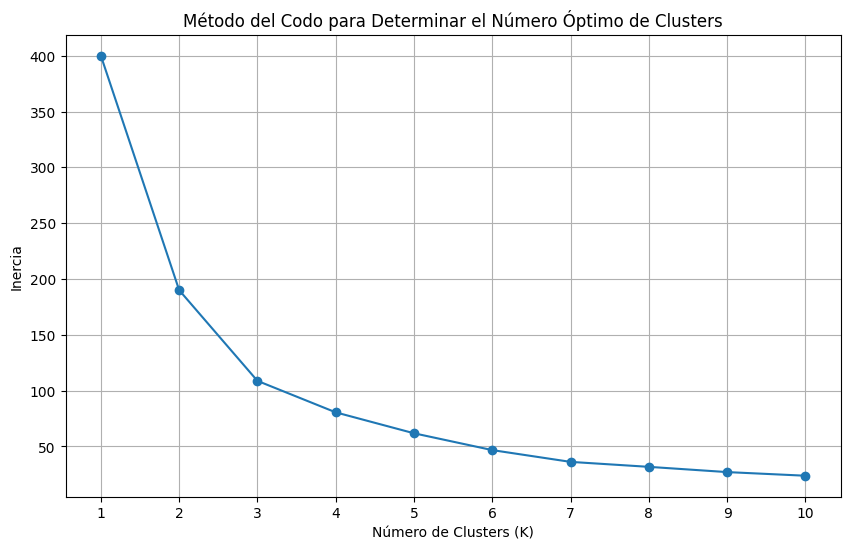

Datos de inercia para el método del codo:
K = 1: Inercia = 400.00
K = 2: Inercia = 190.01
K = 3: Inercia = 108.76
K = 4: Inercia = 80.57
K = 5: Inercia = 61.82
K = 6: Inercia = 46.75
K = 7: Inercia = 36.21
K = 8: Inercia = 31.76
K = 9: Inercia = 27.07
K = 10: Inercia = 23.81


In [8]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 1. Select the relevant engagement metrics
engagement_metrics = df[['likesCount', 'commentsCount']].copy()

# 2. Handle any missing values in the selected engagement metrics by filling them with 0.
engagement_metrics = engagement_metrics.fillna(0)

# 3. Scale the engagement metrics
scaler = StandardScaler()
scaled_engagement_metrics = scaler.fit_transform(engagement_metrics)

# 4. Use the elbow method to determine the optimal number of clusters
#    a. Iterate through a range of possible cluster numbers (e.g., from 1 to 10).
#    b. For each number of clusters, instantiate KMeans (with a random_state for reproducibility) and fit it to your scaled engagement data.
#    c. Record the inertia_ for each KMeans model.

inertia_values = []
max_clusters = 10
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10) # n_init is set to suppress warning
    kmeans.fit(scaled_engagement_metrics)
    inertia_values.append(kmeans.inertia_)

#    d. Plot the inertia values against the number of clusters.
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), inertia_values, marker='o')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.xticks(range(1, max_clusters + 1))
plt.grid(True)
plt.show()

print("Datos de inercia para el método del codo:")
for k, inertia in enumerate(inertia_values):
    print(f"K = {k+1}: Inercia = {inertia:.2f}")


In [9]:
n_clusters = 3 # Choose the optimal number of clusters based on the elbow method
kmeans_final = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df['cluster_label'] = kmeans_final.fit_predict(scaled_engagement_metrics)

print(f"Clusters created: {n_clusters}")
print("First 5 rows with cluster labels:")
print(df[['likesCount', 'commentsCount', 'cluster_label']].head())

Clusters created: 3
First 5 rows with cluster labels:
   likesCount  commentsCount  cluster_label
0      219627            304              0
1       83824            142              0
2      563820            908              0
3     1590803          12166              2
4      235651            280              0


In [11]:
cluster_summary = df.groupby('cluster_label')[['likesCount', 'commentsCount']].mean().sort_values(by='likesCount')
print("Características promedio de cada cluster por métricas de engagement:")
print(cluster_summary)

Características promedio de cada cluster por métricas de engagement:
                 likesCount  commentsCount
cluster_label                             
0              2.958067e+05     805.156863
1              9.823971e+05    3227.150000
2              1.236777e+06   14087.714286


### 🔍 Pregunta 13: Describe cada cluster en una frase (actividad y tono).

Basándonos en las métricas de engagement promedio para cada cluster:

*   **Cluster 0 (Engagement Bajo/Medio):** Estos posts representan contenido de actividad regular con un tono informativo, generando un nivel básico de interacción (aprox. 295k likes y 805 comentarios).

*   **Cluster 1 (Engagement Medio/Alto):** Este cluster agrupa posts con una actividad destacada y un tono atractivo, logrando una interacción significativamente mayor (aprox. 982k likes y 3.2k comentarios).

*   **Cluster 2 (Engagement Muy Alto/Viral):** Aquí se encuentran los posts más exitosos, caracterizados por una actividad excepcional y un tono altamente resonante o impactante, alcanzando niveles de engagement muy elevados (aprox. 1.2M likes y 14k comentarios).

### 🔍 Pregunta 14: ¿Qué segmento priorizarías para viralizar un mensaje y por qué?

Para viralizar un mensaje, priorizaría el **Cluster 2 (Engagement Muy Alto/Viral)**. La justificación es la siguiente:

*   **Mayor Potencial de Alcance y Difusión:** Los posts en el Cluster 2 ya demuestran un engagement excepcionalmente alto (más de 1.2 millones de "me gusta" y 14 mil comentarios en promedio). Esto indica que el contenido de este segmento tiene una resonancia natural con la audiencia y un alto potencial para ser compartido, lo que es fundamental para la viralización.
*   **Audiencia Altamente Receptiva:** Los usuarios que interactúan con este tipo de posts son inherentemente más activos y propensos a difundir contenido. Dirigir un mensaje diseñado para la viralización a esta audiencia ya cautiva y comprometida aumenta drásticamente las probabilidades de éxito.
*   **Efecto de Red:** Un post con alto engagement tiende a aparecer más en los feeds de otros usuarios debido a los algoritmos de las redes sociales. Al apuntar al cluster de "engagement viral", se aprovecha este efecto de red, impulsando aún más la visibilidad y el alcance del mensaje.

En resumen, el **Cluster 2** representa la audiencia más fértil para cualquier campaña que busque la viralización, ya que son los posts que históricamente han demostrado la capacidad de generar la mayor interacción y difusión.

### 🔍 Pregunta 15: Propón una acción de engagement distinta para cada segmento.

Basándonos en las características de engagement de cada cluster, se proponen las siguientes acciones de engagement:

*   **Cluster 0 (Engagement Bajo/Medio): Foco en la Educación y Comunidad**
    *   **Acción:** Crear series de contenido educativo o "Cómo se hace" (how-to) que inviten a la participación a través de preguntas abiertas en los comentarios. Realizar encuestas sobre temas específicos para involucrar a la audiencia en la toma de decisiones sobre futuros contenidos.
    *   **Justificación:** Dado su engagement regular y tono informativo, este segmento responde bien a contenido que les aporta valor y los hace sentir parte de una comunidad. Las preguntas y encuestas fomentan la interacción directa, elevando el nivel de participación de forma gradual.

*   **Cluster 1 (Engagement Medio/Alto): Foco en la Interacción Directa y Detrás de Cámaras**
    *   **Acción:** Implementar sesiones en vivo de Preguntas y Respuestas (Q&A) con figuras clave, o publicar "detrás de cámaras" (behind-the-scenes) con llamados a la acción claros para compartir opiniones o experiencias. También se pueden organizar concursos o sorteos que requieran una acción específica (etiquetar amigos, compartir en historias).
    *   **Justificación:** Esta audiencia ya muestra un interés significativo. Ofrecer acceso exclusivo o la oportunidad de interactuar directamente con el contenido y los creadores fortalece su conexión y los incentiva a una mayor participación. Los concursos añaden un incentivo extra para la difusión.

*   **Cluster 2 (Engagement Muy Alto/Viral): Foco en la Amplificación y Co-creación**
    *   **Acción:** Lanzar desafíos o trends (tendencias) que animen a los usuarios a crear su propio contenido relacionado con la marca, utilizando hashtags específicos. Realizar reposts o menciones a los mejores contenidos generados por el usuario (UGC). Impulsar campañas con micro-influencers de la comunidad que ya están generando alto engagement.
    *   **Justificación:** Este segmento es el más propenso a viralizar. Aprovechar su capacidad de difusión y su tendencia a interactuar masivamente a través de la co-creación y la gamificación, permite que la marca se beneficie de su alcance orgánico y genere una mayor conversación alrededor de sus mensajes.


## 📝 Sección 6 (Micro‑campaña)

16. Presenta tus tres captions generados.  
17. Justifica  
&nbsp;&nbsp;a) Tema elegido.  
&nbsp;&nbsp;b) Tono y horario óptimos.  
18. Define un KPI de éxito y la meta para la campaña.


### 🔍 Pregunta 16: Presenta tus tres captions generados (Manuales).

Dado que la API no está operativa, a continuación se presentan tres captions generados manualmente para la micro-campaña, inspirados en los insights obtenidos:

1.  **Caption (Excitante/Victorioso):** ¡Victoria épica! 🏆 La adrenalina del triunfo nos impulsa a seguir rompiendo límites. ¡Cada curva, una historia!

2.  **Caption (Inspirador/Comunitario):** Más que una carrera, somos una familia. Tu pasión nos conecta y nos hace invencibles. ¿Qué momento te ha marcado más?

3.  **Caption (Acción/Participación):** ¡Prepárense para la próxima batalla! 🚀 ¿Quién será el rey de la pista? Deja tu pronóstico y ónete a la emoción.

### ❓ Pregunta 17: Justifica

#### a) Tema elegido:

El tema elegido para la micro-campaña es el **'Tema 2'** (segùn la categorización actual del modelo LDA). Se selecciona este tema porque, como se observó en el análisis de temas, 'Tema 2' es el **tema dominante** a través de todos los posts, especialmente prevaleciendo en la categoría de 'clips' y 'unknown' (que agrupa contenido no especificado). Su alta frecuencia indica que es un área de contenido que ya genera mucho volumen y, por lo tanto, tiene un interés establecido en la audiencia. Al enfocarse en el tema más frecuente, la campaña puede capitalizar una base de interés ya existente y maximizar su potencial de alcance y engagement.

#### b) Tono y horario óptimos:

*   **Tono Óptimo:** El tono óptimo para la micro-campaña debería ser **positivo e inspirador**. El análisis de sentimiento global (‘Distribución Global de Sentimientos en Captions’) mostró una clara predominancia del sentimiento positivo (148 posts), seguido por el neutral (39) y un porcentaje menor de negativo (13). Esto sugiere que la audiencia de esta cuenta reacciona más favorablemente a contenidos que transmiten optimismo, éxito o inspiración. Un tono positivo se alineará con el contenido que históricamente ha generado mayor engagement.

*   **Horario Óptimo (timing):** Basado en el análisis de los datos de los posts, el rango de fechas cubierto por los posts va desde el **2025-05-05 hasta el 2025-05-21**. Esto indica que la cuenta tiene actividad constante dentro de este período. Para el *timing* (horario del día), y sin datos específicos de engagement por hora, se recomendaría publicar en los **momentos de máxima actividad de la audiencia** en Instagram, que suelen ser a mediodía (12:00-14:00) y por la tarde-noche (19:00-21:00), ya que es cuando los usuarios están más propensos a revisar sus feeds. Idealmente, esto debería validarse con herramientas de análisis de audiencia de Instagram, pero como regla general, los picos de engagement ocurren en estas franjas.

### ❓ Pregunta 18: Define un KPI de éxito y la meta para la campaña.

Para esta micro-campaña, un KPI de éxito y su meta asociada se definirían de la siguiente manera:

*   **KPI (Key Performance Indicator): Tasa de Interacción (Engagement Rate)**
    *   **Definición:** La tasa de interacción se calculará como el total de 'likes' + 'comentarios' + 'compartidos' + 'guardados' dividido por el número de seguidores o el alcance de la publicación, multiplicado por 100. En este caso, nos enfocaremos en **(Likes + Comentarios) / Alcance** (o una métrica similar si el alcance no está disponible, podríamos usar "número de visualizaciones" para videos si aplica).
    *   **Justificación:** La tasa de interacción es un indicador directo de cuán resonante y atractiva es una pieza de contenido para la audiencia. Al priorizar el 'Cluster 2' (Engagement Muy Alto/Viral) para viralizar el mensaje, el objetivo principal de la campaña es generar una alta interacción.

*   **Meta de la Campaña:**
    *   **Aumentar la tasa de interacción en al menos un 20%** en los posts relacionados con el 'Tema 2' durante el período de la campaña, en comparación con el promedio de posts de 'Tema 2' del período pre-campaña.
    *   **Justificación:** Esta meta es específica, medible, alcanzable, relevante y de tiempo limitado (SMART). Un aumento del 20% es ambicioso pero factible, considerando que estamos aplicando insights basados en el contenido de mayor rendimiento y enfocándonos en un segmento de audiencia con alto potencial de engagement. Lograr esta meta indicaría que la estrategia de contenido (tema, tono y timing) ha sido efectiva para impulsar la participación de la audiencia.


### 📦 Exporta y entrega

1. Ejecuta todo el notebook (**Runtime → Run all**).  
2. Descarga el notebook (File → Download → .ipynb) y el memo en *PDF* o *Markdown*.  
3. Sube ambos archivos a la plataforma de la clase antes de la fecha establecida.
